## Install Required Packages

In [2]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------- ----------------------- 5.2/12.6 MB 31.0 MB/s eta 0:00:01
   ----------------------------------- ---- 11.3/12.6 MB 29.3 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 27.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 26.6 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl (2.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl (41.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import data from excel file

In [4]:
df = pd.read_csv("dataset1.csv")
print(df.head())

   Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       1   66120.267939                  8                0   
1   20       1   23579.773583                  4                2   
2   27       1  127821.306432                 11                2   
3   24       1  137798.623120                 19                3   
4   31       1   99300.964220                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0           30.568601               0                 5               1  
1           38.240097               0                 5               0  
2           31.633212               1                 0               1  
3           46.167059               0                 4               1  
4           19.823592               0                 0               1  


In [5]:
# Feature engineer loyalty * discount for additional feature

df["LoyaltyProgram_Discounts"] = df["LoyaltyProgram"] * df["DiscountsAvailed"] 
print(df.head())

# Load X (independent) vars and Y (dependent/predictive) var

X = df[['Age', 'NumberOfPurchases', 'LoyaltyProgram', 'DiscountsAvailed', 'LoyaltyProgram_Discounts']]
y = df['PurchaseStatus']

   Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       1   66120.267939                  8                0   
1   20       1   23579.773583                  4                2   
2   27       1  127821.306432                 11                2   
3   24       1  137798.623120                 19                3   
4   31       1   99300.964220                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  \
0           30.568601               0                 5               1   
1           38.240097               0                 5               0   
2           31.633212               1                 0               1   
3           46.167059               0                 4               1   
4           19.823592               0                 0               1   

   LoyaltyProgram_Discounts  
0                         0  
1                         0  
2                         0  
3             

In [6]:
# Split data into training/testing (80% train / 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Correlation Graph testing

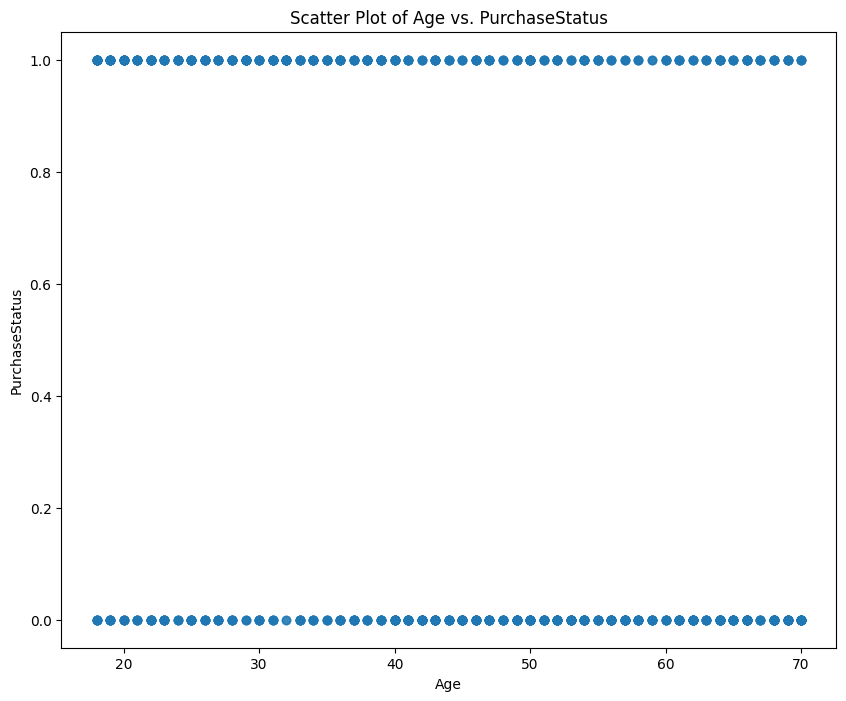

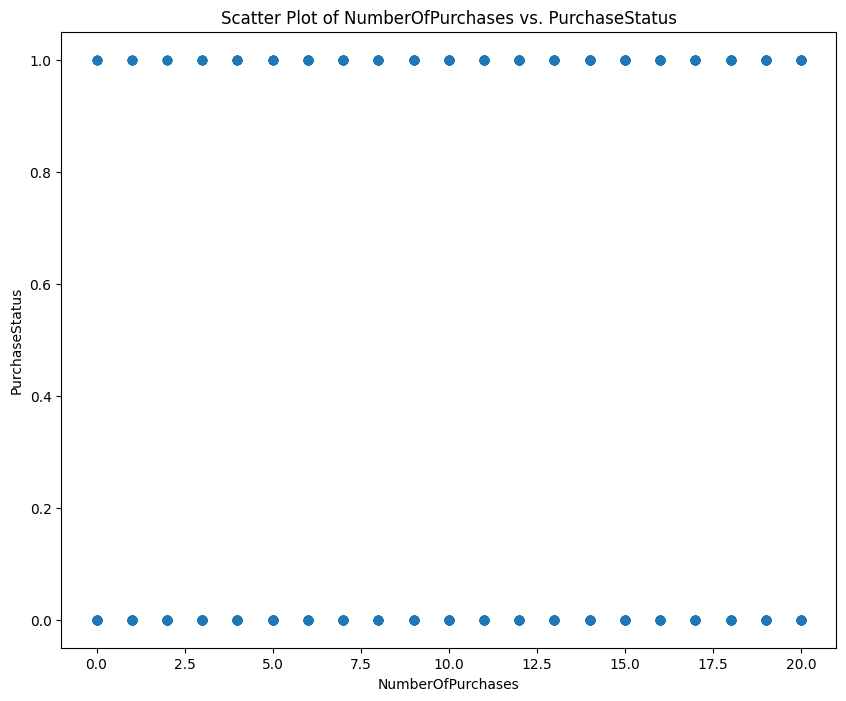

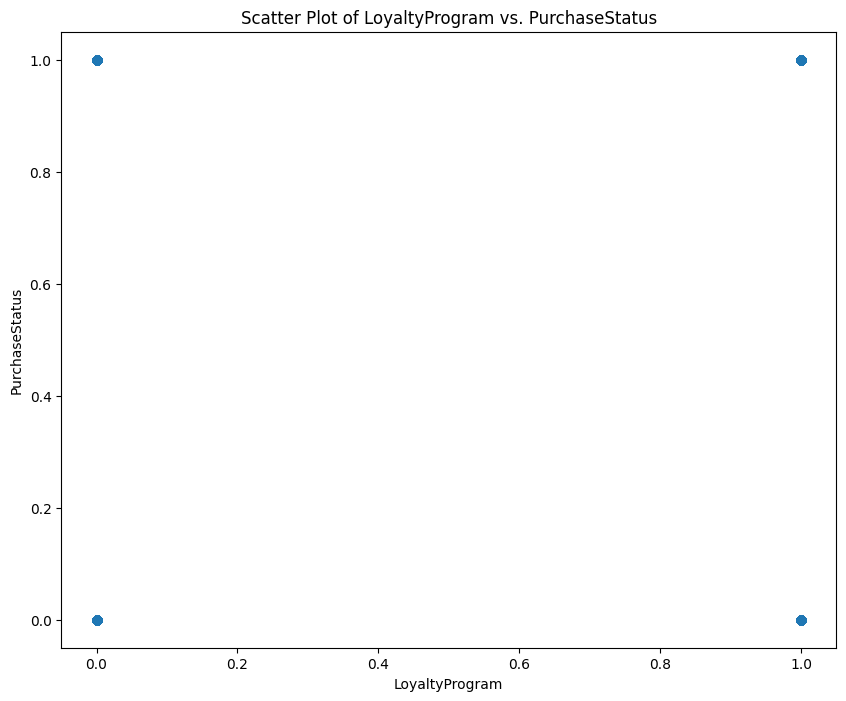

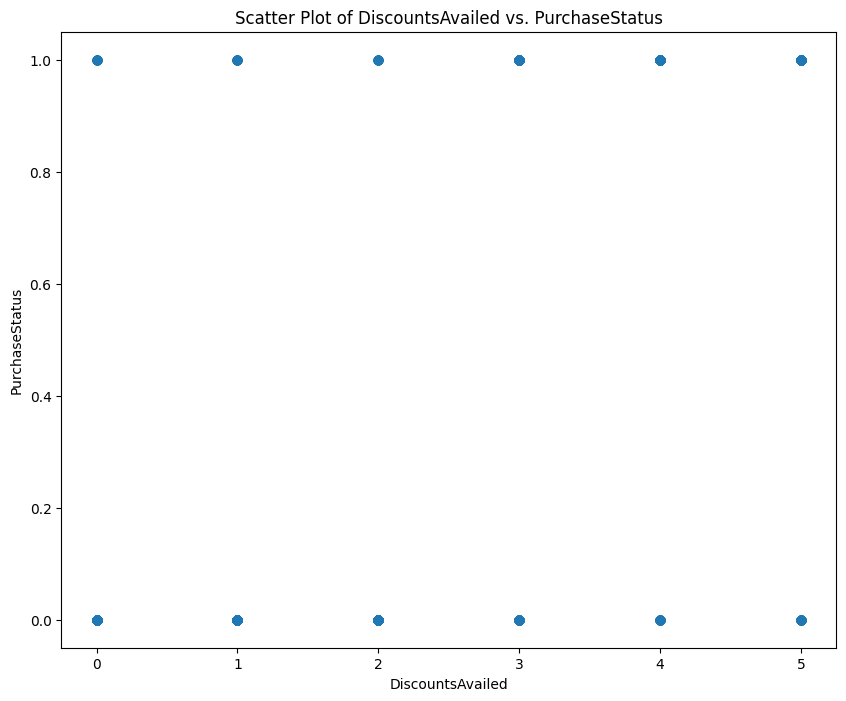

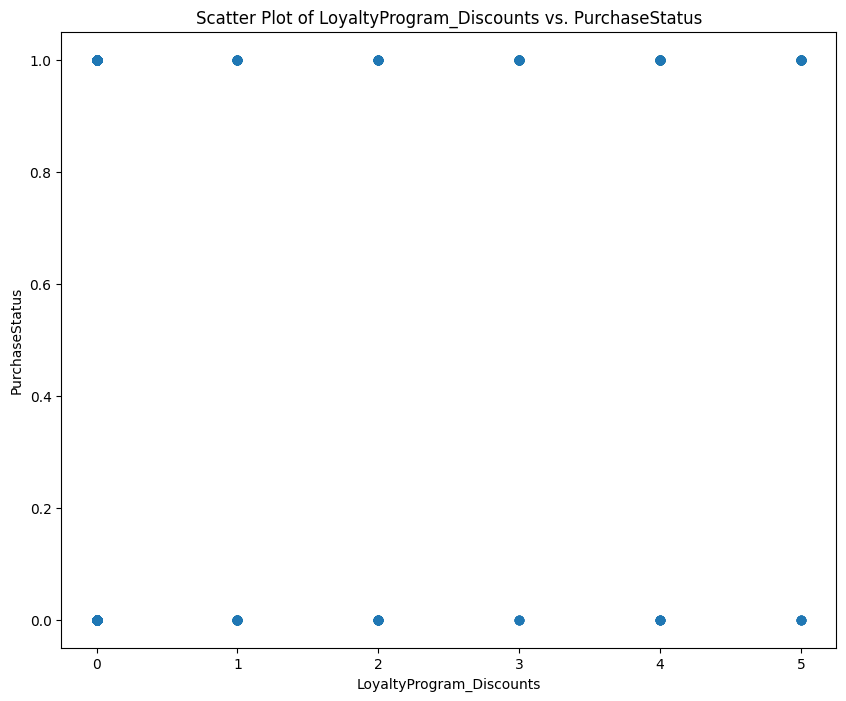

In [7]:
predictors = ['Age', 'NumberOfPurchases', 'LoyaltyProgram', 'DiscountsAvailed', 'LoyaltyProgram_Discounts'] #initialize predictors for graphing

# create scatter plots for each X var to check for individual correlation
for predictor in predictors:
    plt.figure(figsize=(10, 8))
    plt.scatter(df[predictor], df['PurchaseStatus'], alpha=0.5)
    plt.xlabel(predictor)
    plt.ylabel('PurchaseStatus')
    plt.title(f'Scatter Plot of {predictor} vs. PurchaseStatus')
    plt.show()

                               Age  NumberOfPurchases  LoyaltyProgram  \
Age                       1.000000          -0.038778       -0.005980   
NumberOfPurchases        -0.038778           1.000000        0.055358   
LoyaltyProgram           -0.005980           0.055358        1.000000   
DiscountsAvailed          0.004009           0.029581       -0.048462   
LoyaltyProgram_Discounts  0.009745           0.058550        0.757781   
PurchaseStatus           -0.255747           0.222691        0.310838   

                          DiscountsAvailed  LoyaltyProgram_Discounts  \
Age                               0.004009                  0.009745   
NumberOfPurchases                 0.029581                  0.058550   
LoyaltyProgram                   -0.048462                  0.757781   
DiscountsAvailed                  1.000000                  0.339969   
LoyaltyProgram_Discounts          0.339969                  1.000000   
PurchaseStatus                    0.303297              

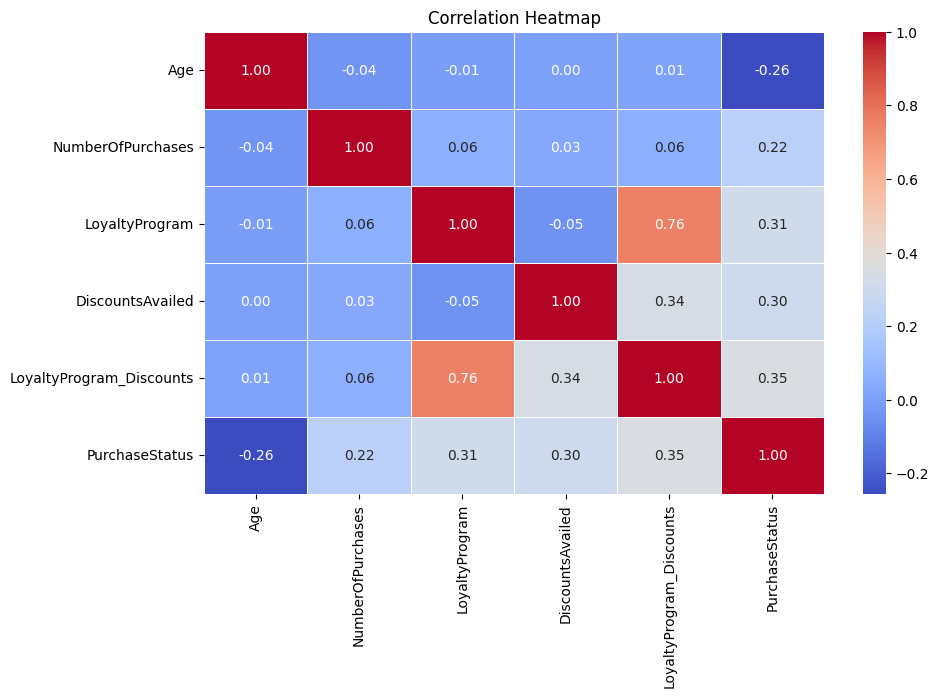

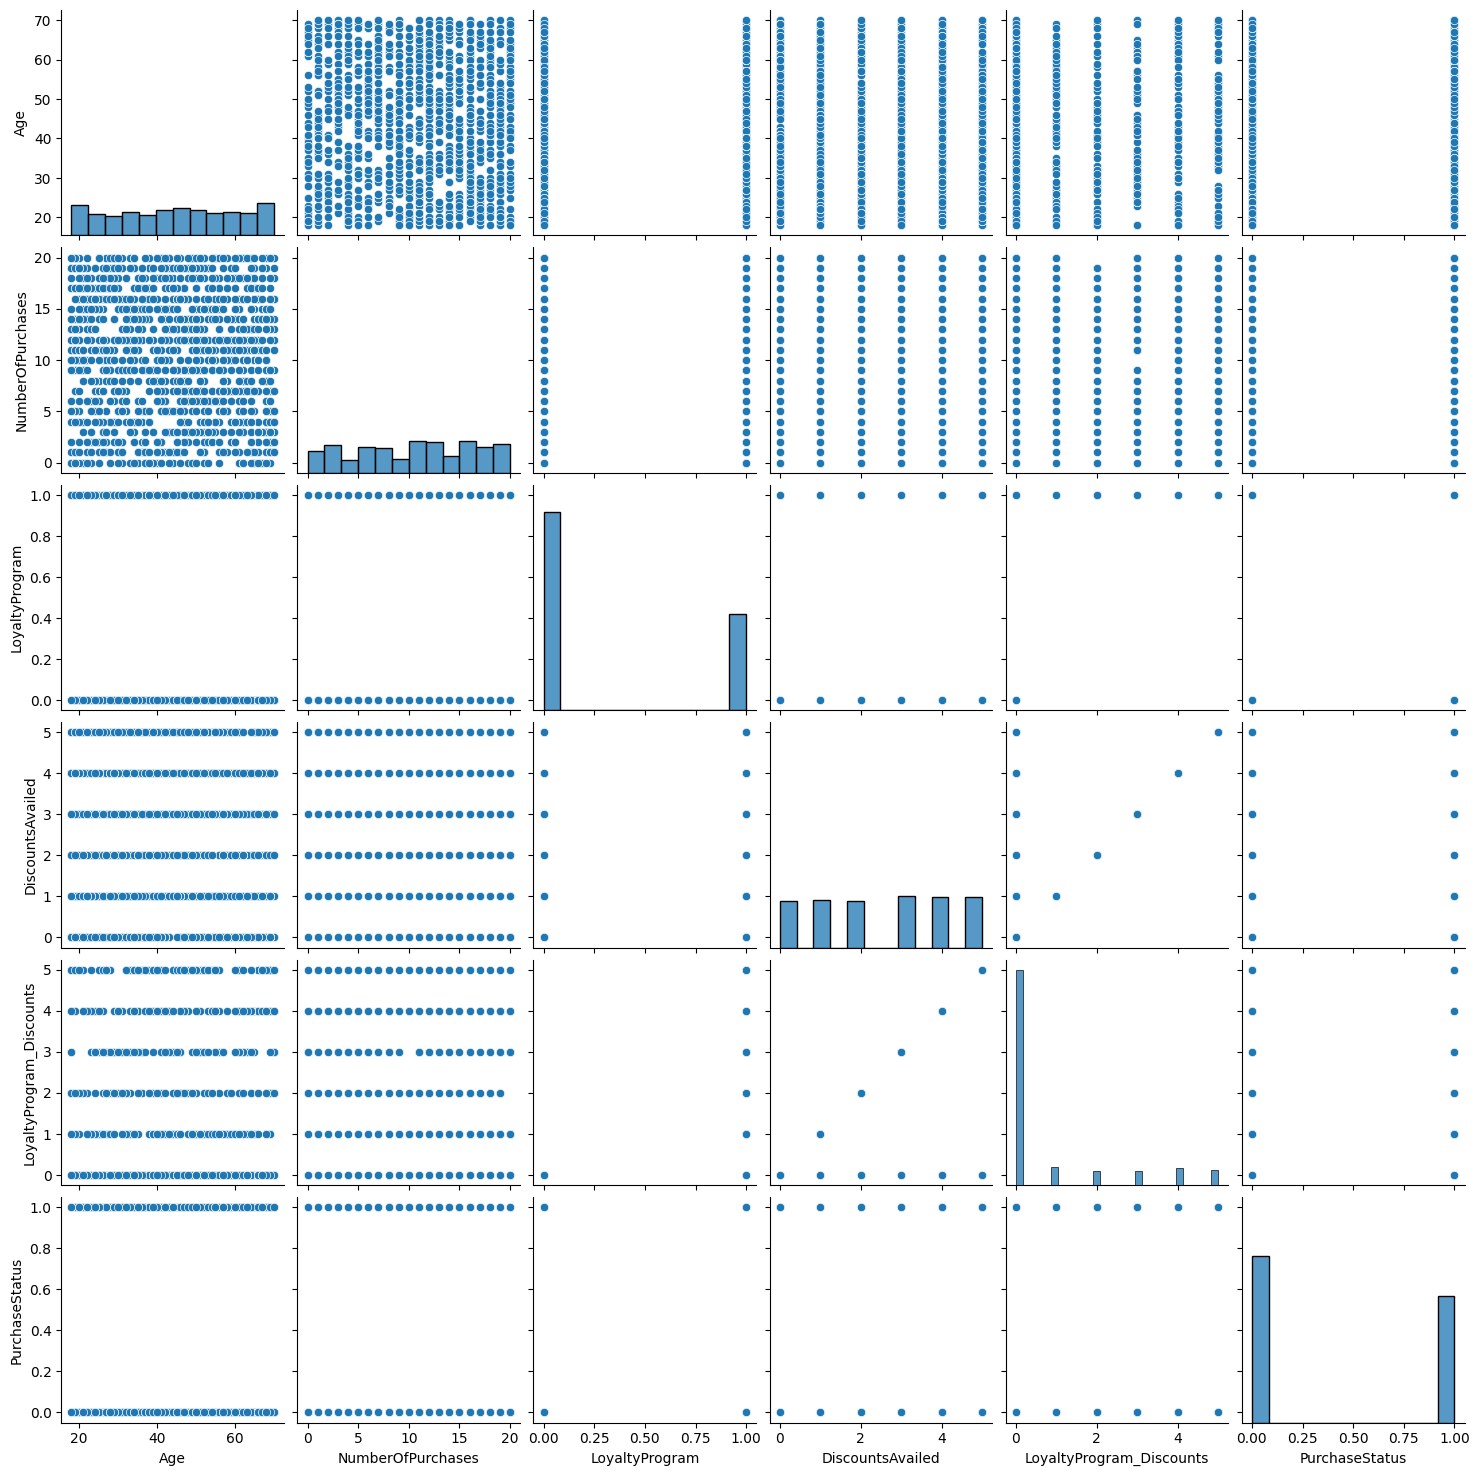

In [8]:
# create heatmap for overall X and Y correlation


df_sel = df[['Age', 'NumberOfPurchases', 'LoyaltyProgram', 'DiscountsAvailed', 'LoyaltyProgram_Discounts', 'PurchaseStatus']] # create new df with only selected vals
corr_matrix = df_sel.corr() # call corr function on new df to calculate correlation coefficent
print(corr_matrix) # display the correlation matrix with calculated pearson vals


# Create Heatmap
plt.figure(figsize=(10, 6)) # length, width def
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) # create seaborn heatmap
plt.title("Correlation Heatmap") # title
plt.show() # show heatmap
sns.pairplot(df_sel) # pairplot
plt.show() # show pairplot


# Model Building

In [9]:
# Define model using Logistic Regression library function
model = LogisticRegression()

In [10]:
# train the model using fit()
model.fit(x_train, y_train)

LogisticRegression()

In [11]:
# make a prediction with the model using predict() function
model.predict(x_test)

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [12]:
# test the model accuracy using the test size (~300 rows)
# Score = 75%
model.score(x_test, y_test)

0.75

In [13]:
# Check the scores in each test case to see the percentage split
model.predict_proba(x_test)

array([[0.07742627, 0.92257373],
       [0.87949715, 0.12050285],
       [0.849526  , 0.150474  ],
       [0.69563691, 0.30436309],
       [0.18997462, 0.81002538],
       [0.93774597, 0.06225403],
       [0.01920709, 0.98079291],
       [0.60383664, 0.39616336],
       [0.83456948, 0.16543052],
       [0.84167233, 0.15832767],
       [0.01347411, 0.98652589],
       [0.34575173, 0.65424827],
       [0.72641242, 0.27358758],
       [0.66291144, 0.33708856],
       [0.06426689, 0.93573311],
       [0.90628108, 0.09371892],
       [0.14540064, 0.85459936],
       [0.71868292, 0.28131708],
       [0.62075858, 0.37924142],
       [0.51627432, 0.48372568],
       [0.60365418, 0.39634582],
       [0.22859064, 0.77140936],
       [0.67367588, 0.32632412],
       [0.02868147, 0.97131853],
       [0.80375868, 0.19624132],
       [0.74089529, 0.25910471],
       [0.76207381, 0.23792619],
       [0.25744715, 0.74255285],
       [0.93272913, 0.06727087],
       [0.41137038, 0.58862962],
       [0.

In [14]:
import joblib

# Replace with your actual model variable name
joblib.dump(model, 'logistic_model.pkl')

['logistic_model.pkl']